In [1]:
from comet_ml import Experiment

In [2]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
import shap
import pickle

import sys
sys.path.append('../ift6758/data/')

from question_5_plots import *

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kleitoun/random-forest/6f03947a74c5418ca3d7038bcb35ac57



In [3]:
df = pd.read_csv('final_df.csv')

## Set the parameters and the proper dataset for the model

In [4]:
model = RandomForestClassifier()
param_grid = {'random_state':[1],
             'n_estimators':[50,75,100,125,150],
              'max_depth':[6,8,10,12,14,16]
              }

In [5]:
search = GridSearchCV(model,param_grid,scoring='balanced_accuracy',cv=5,refit=True,error_score='raise')

In [6]:
# training (train+validation sets for model) and test tests creation

df_train = df[df['season'] != 20192020]
df_test = df[df['season'] == 20192020]

## Select the appropriate features

In [7]:
old_feat = ['game_id', 'season', 'season_type', 'event_id', 'home_team',
       'away_team', 'home_team_side_1st_period', 'attacking_team',
       'attacking_player', 'goalie', 'period', 'period_time', 'goal_ind',
       'shot_ind', 'x_coordinates', 'y_coordinates', 'shot_type', 'empty_net',
       'strength', 'gwg', 'previous_event_x_coordinates',
       'previous_event_y_coordinates', 'previous_event_period_time',
       'previous_event_type', 'previous_event_period', 'previous_attacking_team',
       'attacking_team_side']

df_feat = df.iloc[:,:60].columns.tolist()

#features extracted in question 4
new_feat = [feat for feat in df_feat if feat not in old_feat]
print(len(old_feat),len(df_feat),len(new_feat) )

27 60 33


In [8]:
X = df_train[new_feat]
y = df_train['goal_ind']
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.15,random_state=10, stratify=y, shuffle = True)

## Search, using gridsearch, the best model parameters and. use them on the validation set

In [9]:
# %%time

# fit = search.fit(X,y)

In [10]:
# model = fit.best_estimator_
# print(fit.best_estimator_)

## Store the model using pickle to avoid having to run it multiple times

In [11]:
# pickle.dump(model, open("random_forest", 'wb'))

In [12]:
loaded_model = pickle.load(open("random_forest", 'rb'))

In [13]:
# valid_preds = model.predict(X_valid)
valid_preds = loaded_model.predict(X_valid)
accuracy = accuracy_score(y_valid,valid_preds)
roc_auc =  roc_auc_score(y_valid,valid_preds)
report = classification_report(y_valid, valid_preds, output_dict=True)
print(roc_auc, accuracy)

0.5436713047568614 0.914604580336212


## Generate the appropriate plots

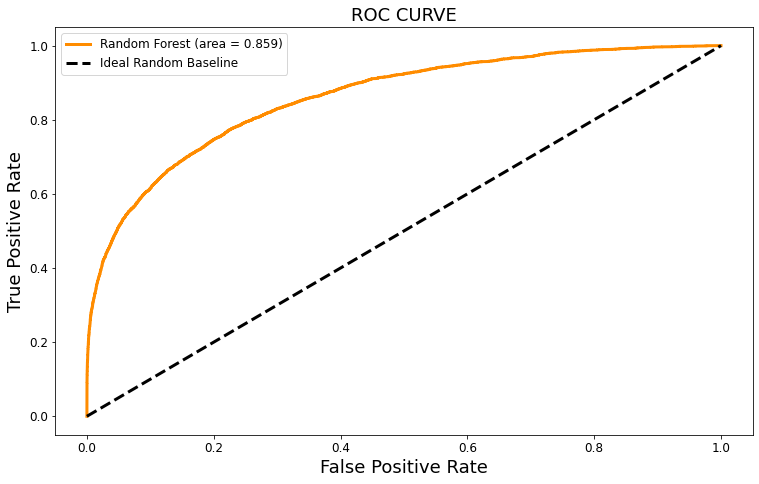

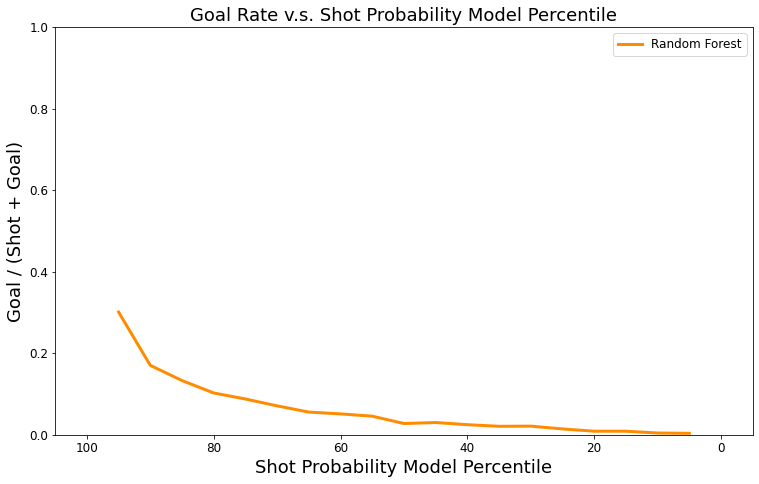

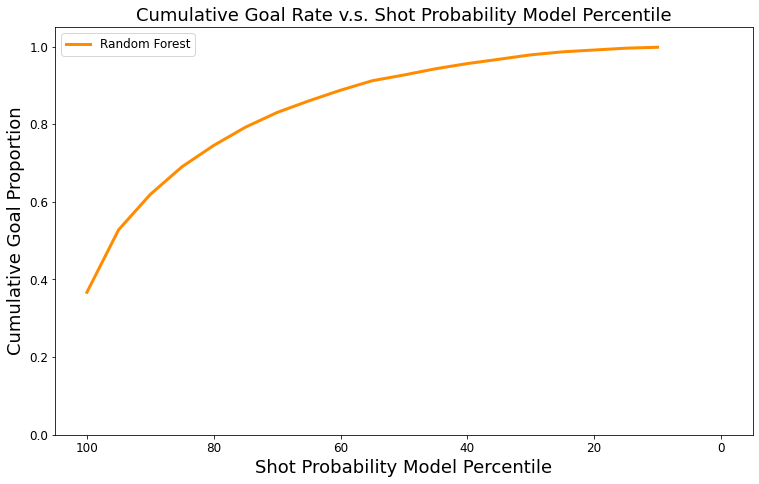

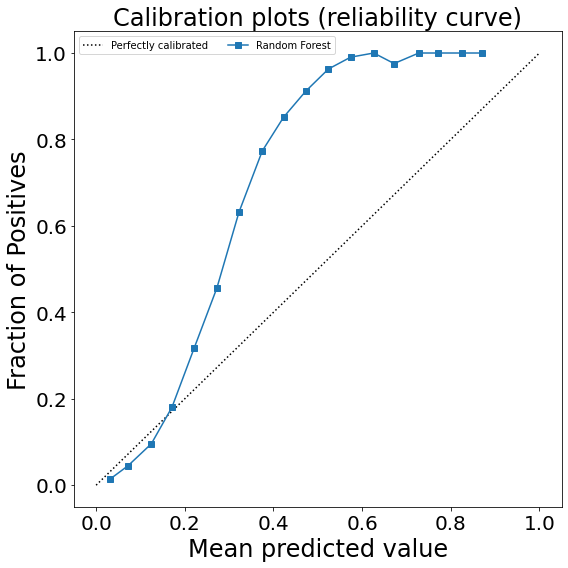

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kleitoun/random-forest/6f03947a74c5418ca3d7038bcb35ac57
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1020.14 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several second

In [14]:
question_no = 6
# perf_eval = Performance_Eval(model, X_train, y_train, X_valid, y_valid, question_no = question_no)
perf_eval = Performance_Eval(loaded_model, 'Random Forest',X_train, y_train, X_valid, y_valid, question_no = question_no)
perf_eval.get_roc_auc_plot()
perf_eval.get_goal_rate_plot()
perf_eval.get_cum_rate_plot()
perf_eval.get_calibration_plot()